In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.data
y = digits.target

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , X.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", y.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [3]:
# digits.data[0:5]
# plt.imshow(np.reshape(X[0], (8,8)))
# X = X.reshape(-1, 8,8)

In [4]:
# training and testing split with 20% test size
X_train_dev, X_test, y_train_dev, y_test = train_test_split(X, y, test_size=.2, random_state=5)

#traning and dev split
X_train, X_dev, y_train, y_dev = train_test_split(X_train_dev, y_train_dev, test_size=.2, random_state=5)

Split data into 80% for training and development and 20% for test. Further split the 80% train_dev in 80% training and 20% development.

In [5]:
# list of max_depth to get the optimal
depth = [ x for x in range(1, 11)]
depth.append(None)
depth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
# parameters for gridsearch
params = {
    'max_depth': depth,
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10]
}

In [8]:
grid_tree = DecisionTreeClassifier(random_state=2)
grid_search = GridSearchCV(estimator=grid_tree, param_grid=params, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [9]:
print('Best parameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 2}
Best score:  0.8441418764302059


Get the best parameters using grid search cross-validation. This helps maximize the checkfor the optimal parameters.

In [10]:
forest = RandomForestClassifier(max_depth=9, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=2)

In [11]:
y_pred = forest.predict(X_test) # make a prediction with the test split

In [12]:
matrix = confusion_matrix(y_test, y_pred)

In [13]:
matrix.sum(axis=1)[:, np.newaxis]
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix

array([[0.97142857, 0.        , 0.        , 0.        , 0.02857143,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.86486486, 0.        ,
        0.02702703, 0.        , 0.        , 0.08108108, 0.02702703],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.93478261, 0.        , 0.        , 0.02173913, 0.04347826],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.96666667, 0.        , 0.03333333, 0.        ],
       [0.        , 0.        , 0.       

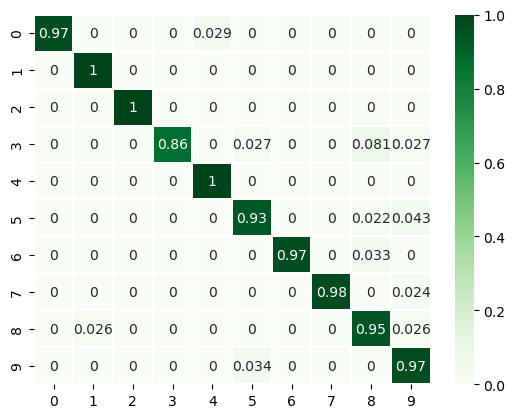

In [14]:
sns.heatmap(matrix, annot=True, cmap='Greens', annot_kws={'size': 10}, linewidths=0.2)
plt.show()

From the confusion matrix, the only struggling class to identify is 3 with a value of 86%

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.9611111111111111


In [16]:
precision = precision_score(y_test, y_pred, average='macro')
print('Precision: ', precision)

Precision:  0.9624008376447402


In [17]:
recall = recall_score(y_test, y_pred, average='macro')
print('Recall: ', recall)

Recall:  0.9626818850278174


In [18]:
f1 = f1_score(y_test, y_pred, average='macro')
print('F1 score: ', f1)

F1 score:  0.9614250167090391


In [19]:
# plt.figure(figsize=(20,4))
# for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
#     plt.subplot(1, 5, index + 1)
#     plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
#     plt.title('Training: %i\n' % label, fontsize = 20)